# Machine Learning models

### 1. Necessary Python libraries are imported

In [1]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn import svm, tree
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as sm
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import time

### 2. Dataset is split into training and testing sets

In [2]:
# Read the data from the 'heart_data.csv' file
data = pd.read_csv('heart_data.csv')

In [3]:
# Separate target column from the features
X = data.iloc[:, 0:13]  # Features
y = data.iloc[:, 13]    # Target variable

In [4]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,45,1,1,110,264,0,0,132,0,1.2,2,0,7
280,68,1,4,144,193,1,0,141,0,3.4,2,2,7
281,57,1,4,130,131,0,0,115,1,1.2,2,1,7
282,57,0,2,130,236,0,2,174,0,0.0,2,1,3


In [5]:
y

0      0
1      1
2      1
3      0
4      0
      ..
279    1
280    1
281    1
282    1
283    0
Name: target, Length: 284, dtype: int64

In [6]:
# 80% training data, 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
print(f'Shape of training data: {X_train.shape}, shape of test data: {X_test.shape} and shape of original data: {X.shape}')

Shape of training data: (227, 13), shape of test data: (57, 13) and shape of original data: (284, 13)


In [8]:
# Combine training features and target columns for training model on CreateML
training_data = pd.concat([X_train, y_train], axis=1)
print(training_data.shape)

training_data.to_csv('training.csv', index=False)

(227, 14)


In [9]:
# Combine test features and target columns for testing model on CreateML
test_data = pd.concat([X_test, y_test], axis=1)
print(test_data.shape)

test_data.to_csv('test.csv', index=False)

(57, 14)


### 3. Classification Machine Learning Models

In [10]:
def evaluate_model(model):
    """Function to evaluate the classification machine learning models"""
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Score the model based on its accuracy of predictions from train data
    predictions_train = model.predict(X_train)
    accuracy_train = accuracy_score(predictions_train, y_train)
    print(f'Accuracy of model predicting from training data: {accuracy_train} \n')
    
    # Store current starting time at which the cell is run to measure execution times
    start = time.time()
    
    # Body of program starts
    
    # Predictions from test data
    predictions_test = model.predict(X_test)

    # Body of program ends
    
    # Store time at which the program ends
    end = time.time()
    total_time = end - start
    print(f'Execution time: {total_time} \n')
    
    # Print classification report
    print(f'Classification Report:\n {classification_report(y_test, predictions_test)}')
    
    # Performance metrics
    results = [accuracy_score(y_test, predictions_test), precision_score(y_test, predictions_test), recall_score(y_test, predictions_test)]
    print(f'Evaluation Metrics:')
    print(f'  Accuracy:  {results[0]}')
    print(f'  Precision: {results[1]}')
    print(f'  Recall:    {results[2]}')
    
    # Cross Validation
    cv = cross_val_score(model, X, y, cv=5)
    print(f'Cross Validation:')
    print(f'  Scores:             {cv}')
    print(f'  Average:            {cv.mean()}')
    print(f'  Standard Deviation: {cv.std()} \n')
    
    # Display confusion matrix
    matrix = confusion_matrix(y_test, predictions_test, labels=[0, 1])
    clearer_matrix = plot_confusion_matrix(model, X_test, y_test)
    print(f'Confusion Matrix Heatmap: {clearer_matrix} \n')

    return((model, total_time, results, cv, matrix))

#### 3a. Support Vector Classifier

Accuracy of model predicting from training data: 0.8546255506607929 

Execution time: 0.0020134449005126953 

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.96      0.85        27
           1       0.96      0.73      0.83        30

    accuracy                           0.84        57
   macro avg       0.86      0.85      0.84        57
weighted avg       0.87      0.84      0.84        57

Evaluation Metrics:
  Accuracy:  0.8421052631578947
  Precision: 0.9565217391304348
  Recall:    0.7333333333333333
Cross Validation:
  Scores:             [0.84210526 0.87719298 0.78947368 0.87719298 0.78571429]
  Average:            0.8343358395989975
  Standard Deviation: 0.04027530712100382 

Confusion Matrix Heatmap: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000018B4DD2AD48> 



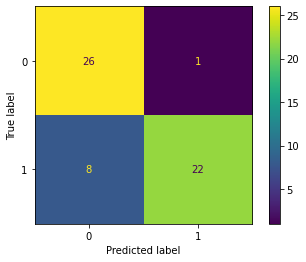

In [11]:
SVC = svm.SVC(kernel='linear', random_state=0, probability=True)
SVC_model, SVC_total_time, SVC_results, SVC_cv, SVC_matrix = evaluate_model(SVC)

#### 3b. K Nearest Neighbours

Accuracy of model predicting from training data: 0.7841409691629956 

Execution time: 0.004529237747192383 

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.74      0.63        27
           1       0.67      0.47      0.55        30

    accuracy                           0.60        57
   macro avg       0.61      0.60      0.59        57
weighted avg       0.61      0.60      0.59        57

Evaluation Metrics:
  Accuracy:  0.5964912280701754
  Precision: 0.6666666666666666
  Recall:    0.4666666666666667
Cross Validation:
  Scores:             [0.64912281 0.61403509 0.59649123 0.68421053 0.64285714]
  Average:            0.63734335839599
  Standard Deviation: 0.03025842260207835 

Confusion Matrix Heatmap: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000018B4FEAAB48> 



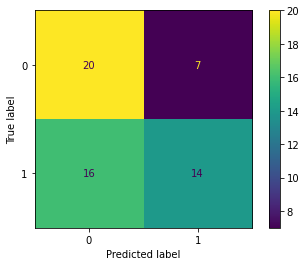

In [12]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN_model, KNN_total_time, KNN_results, KNN_cv, KNN_matrix = evaluate_model(KNN)

#### 3c. Neural Networks

Accuracy of model predicting from training data: 0.8546255506607929 

Execution time: 0.0020627975463867188 

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.93      0.85        27
           1       0.92      0.77      0.84        30

    accuracy                           0.84        57
   macro avg       0.85      0.85      0.84        57
weighted avg       0.85      0.84      0.84        57

Evaluation Metrics:
  Accuracy:  0.8421052631578947
  Precision: 0.92
  Recall:    0.7666666666666667
Cross Validation:
  Scores:             [0.71929825 0.8245614  0.80701754 0.78947368 0.75      ]
  Average:            0.7780701754385964
  Standard Deviation: 0.03839661162848997 

Confusion Matrix Heatmap: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000018B4FE4BFC8> 



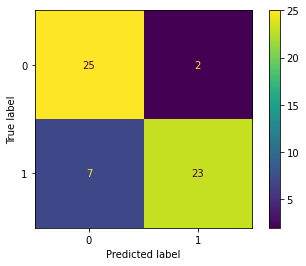

In [13]:
NN = MLPClassifier(random_state=0, max_iter=1000)
NN_model, NN_total_time, NN_results, NN_cv, NN_matrix = evaluate_model(NN)

#### 3d. Logistic Regression

Accuracy of model predicting from training data: 0.8414096916299559 

Execution time: 0.002001047134399414 

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.96      0.87        27
           1       0.96      0.77      0.85        30

    accuracy                           0.86        57
   macro avg       0.87      0.86      0.86        57
weighted avg       0.88      0.86      0.86        57

Evaluation Metrics:
  Accuracy:  0.8596491228070176
  Precision: 0.9583333333333334
  Recall:    0.7666666666666667
Cross Validation:
  Scores:             [0.78947368 0.85964912 0.78947368 0.85964912 0.78571429]
  Average:            0.8167919799498747
  Standard Deviation: 0.03501962601445327 

Confusion Matrix Heatmap: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000018B4FF61688> 



C:\Users\forum\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


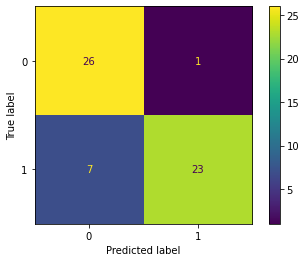

In [14]:
LR = LogisticRegression(max_iter=1000, random_state=0)
LR_model, LR_total_time, LR_results, LR_cv, LR_matrix = evaluate_model(LR)

#### 3e. Gradient Boosting Trees

Accuracy of model predicting from training data: 0.973568281938326 

Execution time: 0.0010004043579101562 

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.96      0.83        27
           1       0.95      0.67      0.78        30

    accuracy                           0.81        57
   macro avg       0.84      0.81      0.80        57
weighted avg       0.84      0.81      0.80        57

Evaluation Metrics:
  Accuracy:  0.8070175438596491
  Precision: 0.9523809523809523
  Recall:    0.6666666666666666
Cross Validation:
  Scores:             [0.80701754 0.89473684 0.77192982 0.75438596 0.73214286]
  Average:            0.7920426065162908
  Standard Deviation: 0.0568874000135333 

Confusion Matrix Heatmap: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x0000018B4FF63D08> 



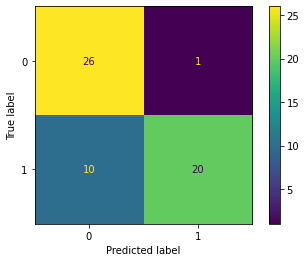

In [15]:
GB = GradientBoostingClassifier(random_state=0, n_estimators=50)
GB_model, GB_total_time, GB_results, GB_cv, GB_matrix = evaluate_model(GB)

### 4. Results are plotted

#### 4a. ROC Curves

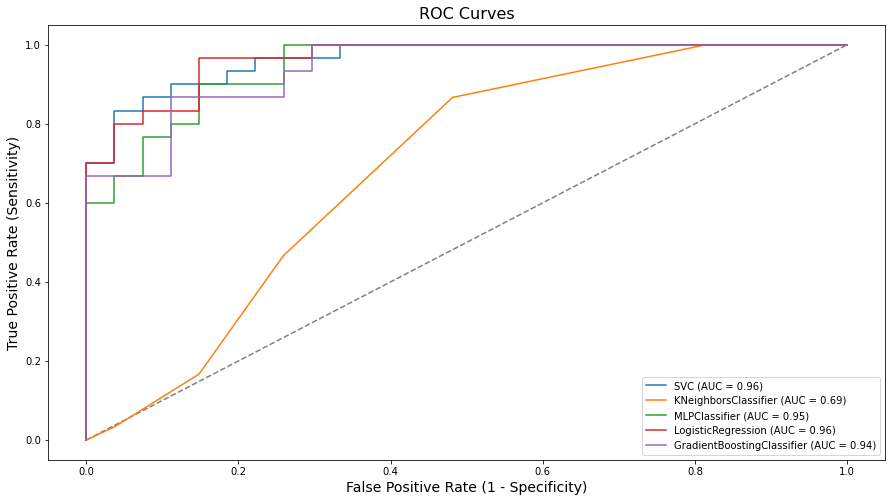

In [16]:
# Plot ROC curves
models = (SVC, KNN, NN, LR, GB)
fprs = []
tprs = []
aucs = []

for model in models:
    # predict_proba() returns probability that target = 0 (1st column) and probability that target = 1 (2nd column)
    y_scores = model.predict_proba(X_test)
    
    # Extract the probability for which target = 1 (patient has heart disease)
    fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])
    auc = sm.auc(fpr, tpr)
    
    fprs.append(fpr)
    tprs.append(tpr)
    aucs.append(auc)
    
# Displaying ROC curve
fig = plt.figure(figsize=(15, 8))

# Diagonal 50% line
plt.plot([0, 1], [0, 1], '--', color='grey')

# Plot the FPR and TPR produced by the models with their AUC scores
plt.plot(fprs[0], tprs[0], label='SVC (AUC = %0.2f)' % aucs[0])
plt.plot(fprs[1], tprs[1], label='KNeighborsClassifier (AUC = %0.2f)' % aucs[1])
plt.plot(fprs[2], tprs[2], label='MLPClassifier (AUC = %0.2f)' % aucs[2])
plt.plot(fprs[3], tprs[3], label='LogisticRegression (AUC = %0.2f)' % aucs[3])
plt.plot(fprs[4], tprs[4], label='GradientBoostingClassifier (AUC = %0.2f)' % aucs[4])

# Format the graph
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14)
plt.title('ROC Curves', fontsize=16)
plt.legend()
plt.show()

#### 4b. Cross Validation Scores

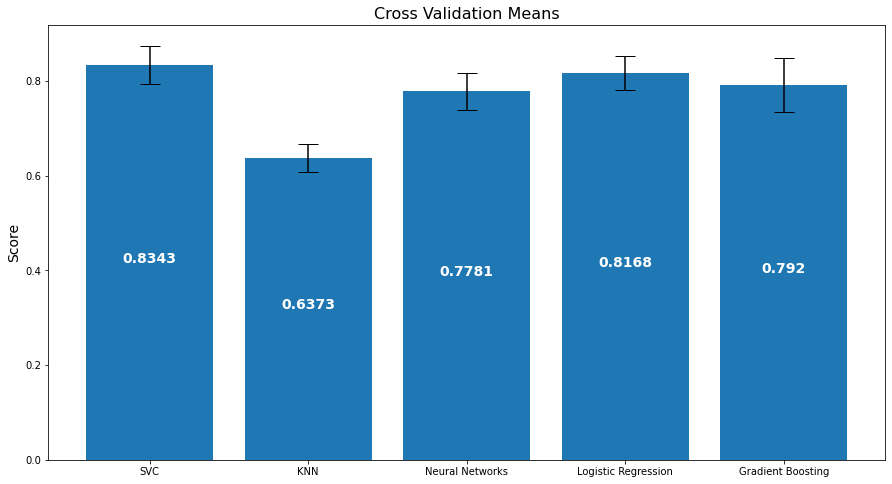

In [17]:
# Plot cross validation scores
models = ('SVC', 'KNN', 'Neural Networks', 'Logistic Regression', 'Gradient Boosting')

means = [SVC_cv.mean(), KNN_cv.mean(), NN_cv.mean(), LR_cv.mean(), GB_cv.mean()]
stds = [SVC_cv.std(), KNN_cv.std(), NN_cv.std(), LR_cv.std(), GB_cv.std()]

fig, ax = plt.subplots(figsize=(15, 8))
x = np.arange(len(models))
ax.bar(x, means, yerr=stds, align='center', ecolor='black', capsize=10)

# Format the graph
ax.set_title('Cross Validation Means', fontsize=16)
ax.set_ylabel('Score', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=0)

# Arrange text within bars
for l in ax.patches:
    width = l.get_width()
    height = l.get_height()
    x, y = l.get_xy()
    ax.annotate(f'{round(height, 4)}', (x + width / 2, y + height / 2), ha='center', fontsize=14, color='white', weight='bold')

plt.show()

#### 4c. Confusion Matrix Metrics

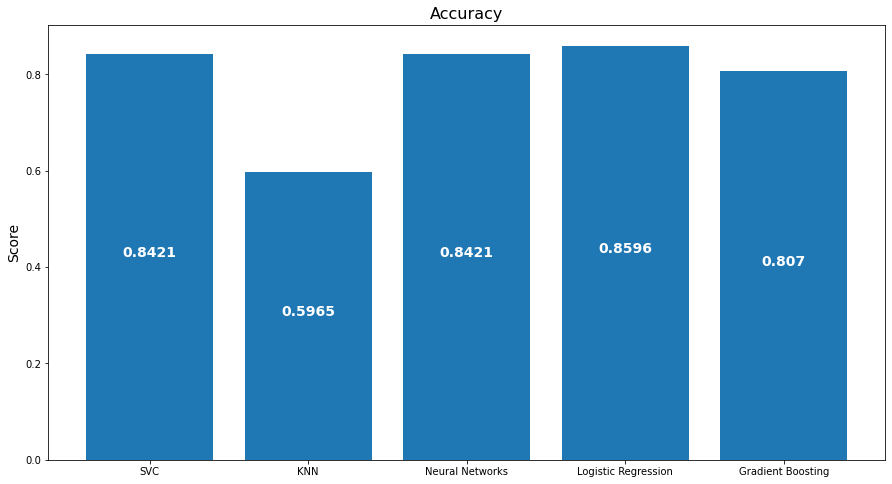

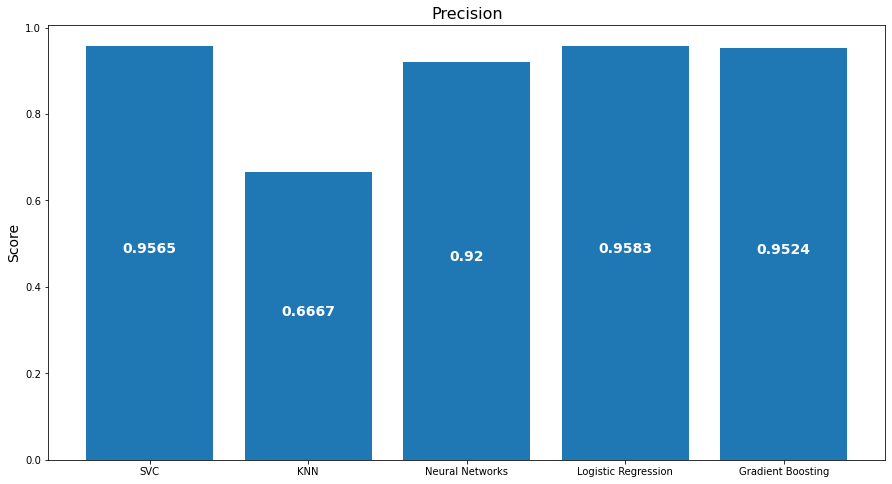

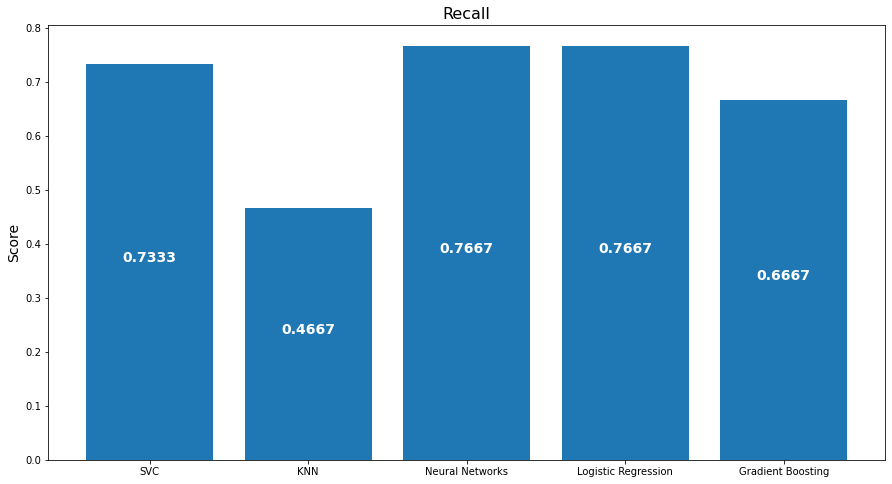

In [18]:
# Plot metrics from the confusion matrix
models = ('SVC', 'KNN', 'Neural Networks', 'Logistic Regression', 'Gradient Boosting')

for metric in range(len(SVC_results)):
    fig, ax = plt.subplots(figsize=(15, 8))
    x = np.arange(len(models))
    results = [SVC_results[metric], KNN_results[metric], NN_results[metric], LR_results[metric], GB_results[metric]]
    ax.bar(x, results)

    # Set titles depending on the metric
    if metric == 0:
        ax.set_title('Accuracy', fontsize=16)
    elif metric == 1:
        ax.set_title('Precision', fontsize=16)
    elif metric == 2:
        ax.set_title('Recall', fontsize=16)
    elif metric == 3:
        ax.set_title('AUC', fontsize=16)

    # Format the graphs
    ax.set_ylabel('Score', fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=0)

    # Arrange text within bars
    for l in ax.patches:
        width = l.get_width()
        height = l.get_height()
        x, y = l.get_xy()
        ax.annotate(f'{round(height, 4)}', (x + width / 2, y + height / 2), ha='center', fontsize=14, color='white', weight='bold')

plt.show()

#### 4d. Sensitivity and Specificity

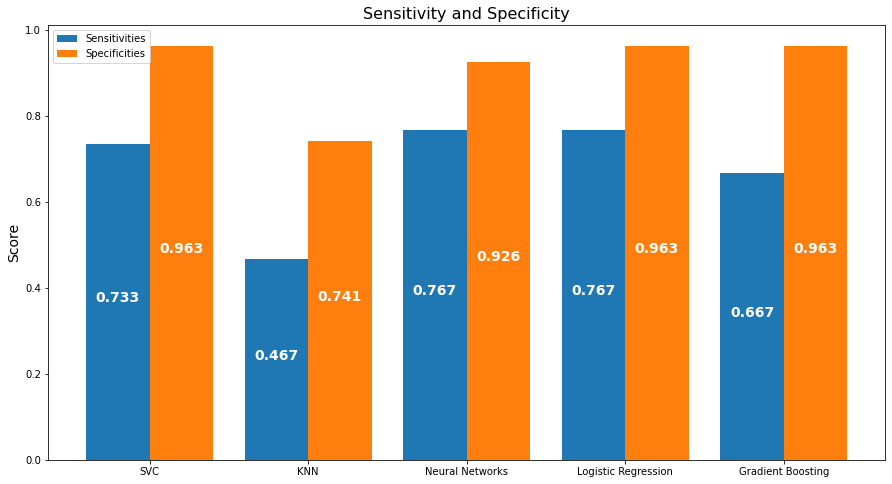

In [19]:
# Plot sensitivities and specificities
models = ('SVC', 'KNN', 'Neural Networks', 'Logistic Regression', 'Gradient Boosting')

confusion_matrices = [SVC_matrix, KNN_matrix, NN_matrix, LR_matrix, GB_matrix]
sensitivities = []
specificities = []

for matrix in confusion_matrices:
    TP = matrix[1][1]
    TN = matrix[0][0]
    FP = matrix[0][1]
    FN = matrix[1][0]
      
    sensitivity = (TP / (TP + FN))
    sensitivities.append(sensitivity)
    specificity = (TN / (TN + FP))
    specificities.append(specificity)

fig, ax = plt.subplots(figsize=(15, 8))
x = np.arange(len(models))
ax.bar(x-0.2, sensitivities, width=0.4, align='center')
ax.bar(x+0.2, specificities, width=0.4, align='center')

# Format the graph
ax.set_ylabel('Score', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=0)
ax.set_title('Sensitivity and Specificity', fontsize=16)
ax.legend(labels=['Sensitivities', 'Specificities'], loc='upper left')

# Arrange text within bars
for l in ax.patches:
    width = l.get_width()
    height = l.get_height()
    x, y = l.get_xy()
    ax.annotate(f'{round(height, 3)}', (x + width / 2, y + height / 2), ha='center', fontsize=14, color='white', weight='bold')

plt.show()

#### 4e. Execution Times

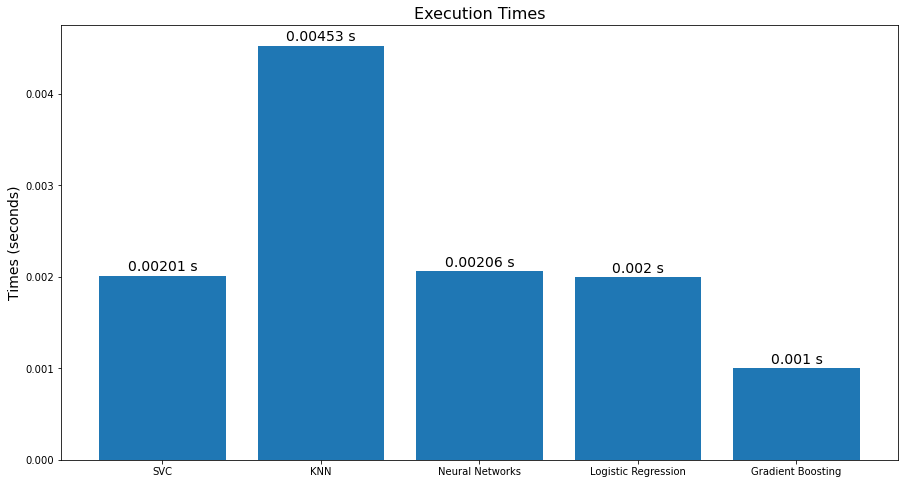

In [20]:
# Plot execution times
models = ('SVC', 'KNN', 'Neural Networks', 'Logistic Regression', 'Gradient Boosting')

execution_times = [SVC_total_time, KNN_total_time, NN_total_time, LR_total_time, GB_total_time]
    
fig, ax = plt.subplots(figsize=(15, 8))
x = np.arange(len(models))
ax.bar(x, execution_times)

# Format the graph
ax.set_ylabel('Times (seconds)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=0)
ax.set_title('Execution Times', fontsize=16)

# Arrange text within bars
for l in ax.patches:
    width = l.get_width()
    height = l.get_height()
    x, y = l.get_xy()
    ax.annotate(f'{round(height, 5)} s', (x + width / 2, y + height + 0.00005), ha='center', fontsize=14, color='black')

plt.show()

#### 4f. Latency

In [21]:
def measure_latency(model):
    """Function to evaluate latency of the machine learning models"""
    
    # Train the model
    model = model.fit(X_train, y_train)
    
    samples = [X_test[:1], X_test[:10], X_test[:20], X_test[:30] , X_test[:40], X_test[:50]]
    times = []
    
    # Measure time taken by model to predict target outcomes of each set of test samples
    for number in samples:
        start = time.time()    
        model.predict(number)
        end = time.time()
        total_time_s = end - start
        total_time_ms = total_time_s * 1000
        
        # Insert the time for each set of test samples to be predicted in a list
        times.append(total_time_ms)
    print(times)
      
    return((model, times))

In [22]:
SVC = svm.SVC(kernel='linear', random_state=0, probability=True)
SVC_model, SVC_times = measure_latency(SVC)

[1.9948482513427734, 1.0001659393310547, 0.9999275207519531, 1.001119613647461, 0.9992122650146484, 1.9998550415039062]


In [23]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN_model, KNN_times = measure_latency(KNN)

[2.9964447021484375, 7.050514221191406, 6.006002426147461, 5.02467155456543, 4.003286361694336, 3.0012130737304688]


In [24]:
NN = MLPClassifier(random_state=0, max_iter=1000)
NN_model, NN_times = measure_latency(NN)

[1.0001659393310547, 0.9999275207519531, 2.0372867584228516, 0.9977817535400391, 1.001596450805664, 0.9977817535400391]


In [25]:
LR = LogisticRegression(max_iter=1000, random_state=0)
LR_model, LR_times = measure_latency(LR)

[0.9982585906982422, 0.9996891021728516, 0.9875297546386719, 2.001047134399414, 0.9987354278564453, 1.012563705444336]


In [26]:
GB = GradientBoostingClassifier(random_state=0, n_estimators=50)
GB_model, GB_times = measure_latency(GB)

[0.9989738464355469, 2.002716064453125, 1.0018348693847656, 0.9961128234863281, 2.0003318786621094, 2.004384994506836]


In [27]:
# List of x axis values
number_of_samples = [1, 10, 20, 30, 40, 50]

# List of y axis values
model_times = [SVC_times, KNN_times, NN_times, LR_times, GB_times]

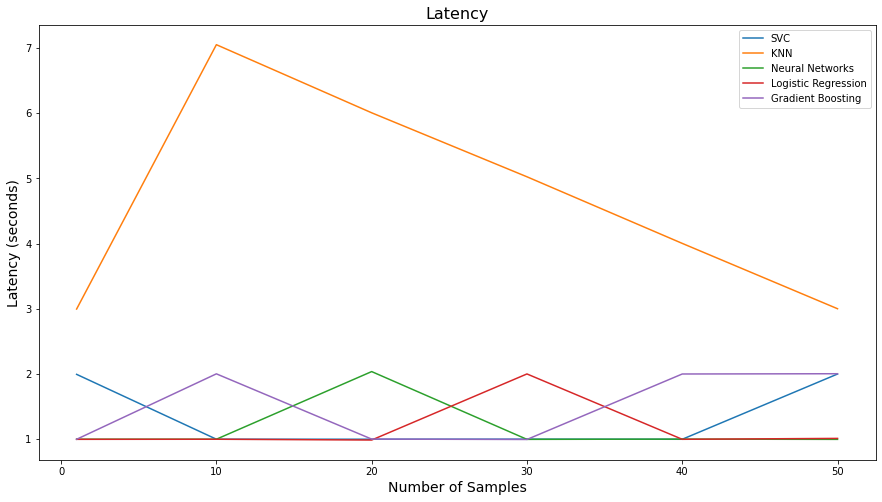

In [28]:
# Plot latency results
plt.figure(figsize=(15, 8))

plt.plot(number_of_samples, model_times[0], label=models[0])
plt.plot(number_of_samples, model_times[1], label=models[1])
plt.plot(number_of_samples, model_times[2], label=models[2])
plt.plot(number_of_samples, model_times[3], label=models[3])
plt.plot(number_of_samples, model_times[4], label=models[4])

# Format the graph
plt.title('Latency', fontsize=16)
plt.xlabel('Number of Samples', fontsize=14)
plt.ylabel('Latency (seconds)', fontsize=14)
plt.legend()

plt.show()

#### 4g. Memory Usage

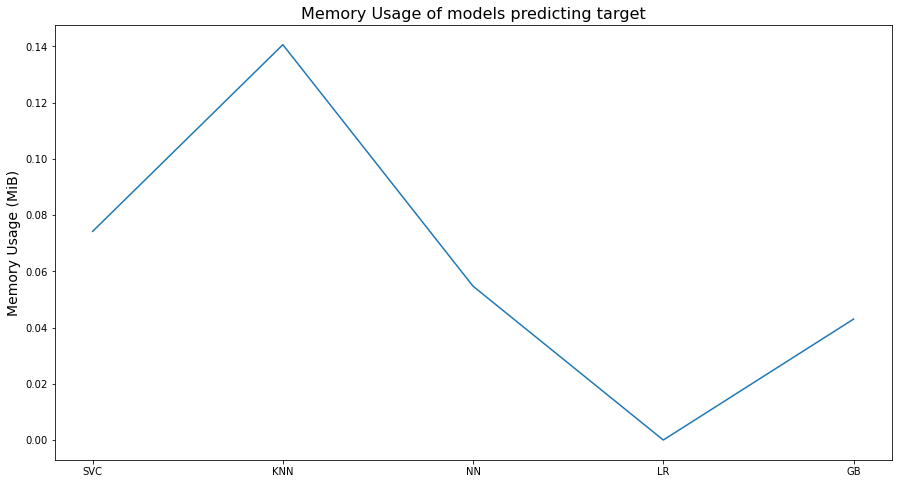

In [29]:
# Memory usage of models predicting target of instance 58 (randomly chosen)
model_abbr = ['SVC', 'KNN', 'NN', 'LR', 'GB']

increments = [0.0742, 0.1406, 0.0547, 0.0000, 0.0430]  # Memory increments from 'memory_usage.txt' file

fig, ax = plt.subplots(figsize=(15, 8))

# Plot memory usage
ax.plot(model_abbr, increments)
ax.set_title('Memory Usage of models predicting target', fontsize=16)
ax.set_ylabel('Memory Usage (MiB)', fontsize=14)

plt.show()

### 5. Ensemble Learning with Classification Models

In [30]:
def evaluate_ensemble_model(ensemble_model):
    """Function to evaluate ensemble learning models with accuracy and execution time"""
        
    # Train the model
    ensemble_model = ensemble_model.fit(X_train, y_train)
    
    # Store current starting time at which the cell is run
    start = time.time()
    
    # Body of program starts
    
    # Predictions from test data
    predictions_test = ensemble_model.predict(X_test)
    
    # Body of program ends
    
    # Store time at which the program ends
    end = time.time()
    total_time = end - start
    print(f'Execution time: {total_time}')
    
    # Generate training score
    train_score = ensemble_model.score(X_train, y_train)
    print('Train Score: %.4f' %train_score)
    
    # Generate test score
    test_score = ensemble_model.score(X_test, y_test)
    print('Test Score: %.4f' %test_score)
    
    results = [train_score, test_score]
    
    return(ensemble_model, results, total_time)

#### 5a. Bagging ensemble learning with Support Vector Classifier

In [31]:
BG_SVC = BaggingClassifier(base_estimator=SVC, n_estimators=10, max_features=13, max_samples=100, random_state=0, n_jobs=5)
BG_SVC_model, BG_SVC_results, BG_SVC_total_time = evaluate_ensemble_model(BG_SVC)

Execution time: 0.016001224517822266
Train Score: 0.8590
Test Score: 0.8246


#### 5b. Bagging ensemble learning with K Nearest Neighbours

In [32]:
BG_KNN = BaggingClassifier(base_estimator=KNN, n_estimators=10, max_features=13, max_samples=100, random_state=0, n_jobs=5)
BG_KNN_model, BG_KNN_results, BG_KNN_total_time = evaluate_ensemble_model(BG_KNN)

Execution time: 0.020000457763671875
Train Score: 0.7401
Test Score: 0.5965


#### 5c. Bagging ensemble learning with Neural Networks

In [33]:
BG_NN = BaggingClassifier(base_estimator=NN, n_estimators=10, max_features=13, max_samples=100, random_state=0, n_jobs=5)
BG_NN_model, BG_NN_results, BG_NN_total_time = evaluate_ensemble_model(BG_NN)

Execution time: 0.12551188468933105
Train Score: 0.8458
Test Score: 0.8070


#### 5d. Bagging ensemble learning with Logistic Regression

In [34]:
BG_LR = BaggingClassifier(base_estimator=LR, n_estimators=10, max_features=13, max_samples=100, random_state=0, n_jobs=5)
BG_LR_model, BG_LR_results, BG_LR_total_time = evaluate_ensemble_model(BG_LR)

Execution time: 0.00993657112121582
Train Score: 0.8590
Test Score: 0.8070


#### 5e. Bagging ensemble learning with Gradient Boosting

In [35]:
BG_GB = BaggingClassifier(base_estimator=GB, n_estimators=10, max_features=13, max_samples=100, random_state=0, n_jobs=5)
BG_GB_model, BG_GB_results, BG_GB_total_time = evaluate_ensemble_model(BG_GB)

Execution time: 0.029998302459716797
Train Score: 0.9207
Test Score: 0.7895


### 6. Results are plotted

#### 6a. Accuracy

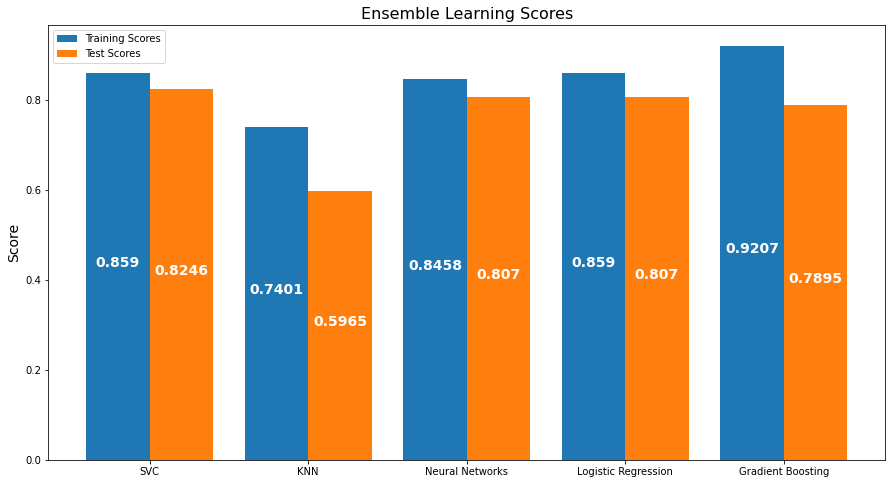

In [36]:
# Plot accuracies
ensemble_models = ('SVC', 'KNN', 'Neural Networks', 'Logistic Regression', 'Gradient Boosting')

training_scores = [BG_SVC_results[0], BG_KNN_results[0], BG_NN_results[0], BG_LR_results[0], BG_GB_results[0]]
test_scores = [BG_SVC_results[1], BG_KNN_results[1], BG_NN_results[1], BG_LR_results[1], BG_GB_results[1]]

fig, ax = plt.subplots(figsize=(15, 8))
x = np.arange(len(ensemble_models))
ax.bar(x-0.2, training_scores, width=0.4, align='center')
ax.bar(x+0.2, test_scores, width=0.4, align='center')

# Format the graph
ax.set_title('Ensemble Learning Scores', fontsize=16)
ax.set_ylabel('Score', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(ensemble_models, rotation=0)
ax.legend(labels=['Training Scores', 'Test Scores'])

# Arrange text within bars
for l in ax.patches:
    width = l.get_width()
    height = l.get_height()
    x, y = l.get_xy()
    ax.annotate(f'{round(height, 4)}', (x + width / 2, y + height / 2), ha='center', fontsize=14, color='white', weight='bold')

plt.show()

#### 6b. Execution Times

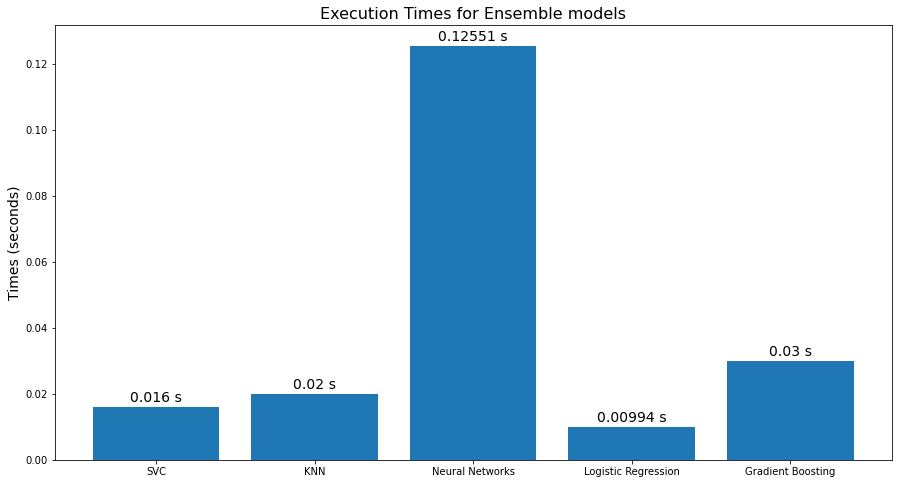

In [37]:
# Plot execution times
ensemble_models = ('SVC', 'KNN', 'Neural Networks', 'Logistic Regression', 'Gradient Boosting')

execution_times = [BG_SVC_total_time, BG_KNN_total_time, BG_NN_total_time, BG_LR_total_time, BG_GB_total_time]
    
fig, ax = plt.subplots(figsize=(15, 8))
x = np.arange(len(ensemble_models))
ax.bar(x, execution_times)

ax.set_ylabel('Times (seconds)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=0)
ax.set_title('Execution Times for Ensemble models', fontsize=16)

# Arrange text within bars
for l in ax.patches:
    width = l.get_width()
    height = l.get_height()
    x, y = l.get_xy()
    ax.annotate(f'{round(height, 5)} s', (x + width / 2, y + height + 0.0015), ha='center', fontsize=14, color='black')

plt.show()

### 7. Predictive System

In [38]:
# Best model to predict
LR = LogisticRegression()
LR.fit(X_train, y_train)

C:\Users\forum\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [39]:
# Instance 23 - Expected result: 0
test_user = (58,0,1,150,283,1,2,162,0,1,1,0,3)

# Preprocess input data
# Change tuple to a numpy array
array = np.asarray(test_user)

# Reshape array to predict for one instance
reshaped_array = array.reshape(1, -1)

predicted_value = LR.predict(reshaped_array)
print(predicted_value)

[0]


### 8. Save Models as Pickle files

In [40]:
# Save models as pickle files for measuring QoS parameters
import pickle

models = [SVC, KNN, NN, LR, GB]

for model in models:
    # Save model to disk
    if model == SVC:
        SVC_file = 'Model Files/SVC_model.pkl'
        pickle.dump(SVC, open(SVC_file, 'wb'))
    if model == KNN:
        KNN_file = 'Model Files/KNN_model.pkl'
        pickle.dump(KNN, open(KNN_file, 'wb'))
    if model == NN:
        NN_file = 'Model Files/NN_model.pkl'
        pickle.dump(NN, open(NN_file, 'wb'))
    if model == LR:
        LR_file = 'Model Files/LR_model.pkl'
        pickle.dump(LR, open(LR_file, 'wb'))
    else:
        GB_file = 'Model Files/GB_model.pkl'
        pickle.dump(GB, open(GB_file, 'wb'))